# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [5]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable


## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
from torchvision import datasets
from torch.utils.data import DataLoader
# Define transforms
## YOUR CODE HERE ##
transform = transforms.Compose([
    transforms.ToTensor(),   
    transforms.Normalize((0.5,), (0.5,))
])

# Create training set and define training dataloader
## YOUR CODE HERE ##
training_data = datasets.MNIST(root="data", train=True, download=True, transform=transform)
train_loader = DataLoader(training_data, batch_size=64, shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = datasets.MNIST(root="data", train=False, download=True, transform=transform)
test_loader = DataLoader(test_data, batch_size=64)

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

For the following reasons, I have transformed the original dataset using ToTensor() and Normalization:

The Python Image Library (PIL) format may be converted to PyTorch tensor format with the aid of ToTensor(). Once the photos are in PyTorch tensor format, we can simply manipulate them and input them into a neural network for the subsequent training or inference phase.
By normalizing the data using the mean and standard deviation of the MNIST dataset, normalization can make neural network training more successful and economical.

Data splitting: Divide the dataset into sets for testing and training. The testing set is used to assess the model's performance, and the training set is used to train the machine learning model.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [4]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

4


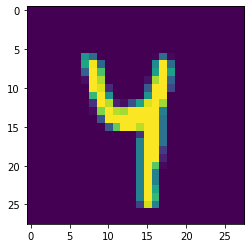

8


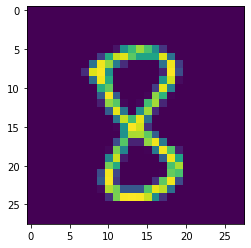

1


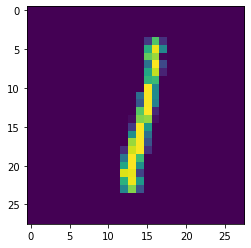

2


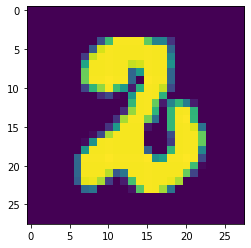

8


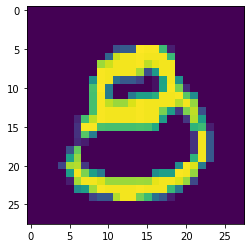

In [5]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Create an instance of the neural network
model = NeuralNetwork()

# Print the model architecture
print(model)

# Move the model to the appropriate device
model.to(device)

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
## YOUR CODE HERE ##
criterion = nn.CrossEntropyLoss()
optimizer= optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
## YOUR CODE HERE ##
n_epochs = 10
model.train()
loss_values = []
accuracy_values = []
for epoch in range(n_epochs):
    run_loss = 0
    run_corrects = 0
    
    for batch_i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        run_loss += loss.item()
        run_corrects += torch.sum(preds == labels.data)
        
        # Print loss and accuracy for every 250 batchs 
        if batch_i % 250 == 249:
            batch_loss = run_loss /250
            batch_accuracy = run_corrects / (250 * train_loader.batch_size)
            print(f"Epoch: {epoch +1 } / {n_epochs}, Batch: {batch_i +1}/{len(train_loader)},Loss:{batch_loss:.5f}, Accuracy:{batch_accuracy:.5f}")
            loss_values.append(batch_loss)
            accuracy_values.append(batch_accuracy)
            run_loss = 0
            run_corrects = 0

Epoch: 1 / 10, Batch: 250/938,Loss:0.65231, Accuracy:0.80969
Epoch: 1 / 10, Batch: 500/938,Loss:0.34615, Accuracy:0.89638
Epoch: 1 / 10, Batch: 750/938,Loss:0.28695, Accuracy:0.91406
Epoch: 2 / 10, Batch: 250/938,Loss:0.21502, Accuracy:0.93856
Epoch: 2 / 10, Batch: 500/938,Loss:0.19119, Accuracy:0.94319
Epoch: 2 / 10, Batch: 750/938,Loss:0.17296, Accuracy:0.94738
Epoch: 3 / 10, Batch: 250/938,Loss:0.13724, Accuracy:0.95869
Epoch: 3 / 10, Batch: 500/938,Loss:0.14476, Accuracy:0.95794
Epoch: 3 / 10, Batch: 750/938,Loss:0.13362, Accuracy:0.95863
Epoch: 4 / 10, Batch: 250/938,Loss:0.11688, Accuracy:0.96406
Epoch: 4 / 10, Batch: 500/938,Loss:0.11396, Accuracy:0.96594
Epoch: 4 / 10, Batch: 750/938,Loss:0.10728, Accuracy:0.96731
Epoch: 5 / 10, Batch: 250/938,Loss:0.10309, Accuracy:0.96794
Epoch: 5 / 10, Batch: 500/938,Loss:0.08537, Accuracy:0.97356
Epoch: 5 / 10, Batch: 750/938,Loss:0.09210, Accuracy:0.97219
Epoch: 6 / 10, Batch: 250/938,Loss:0.08040, Accuracy:0.97494
Epoch: 6 / 10, Batch: 50

Plot the training loss (and validation loss/accuracy, if recorded).

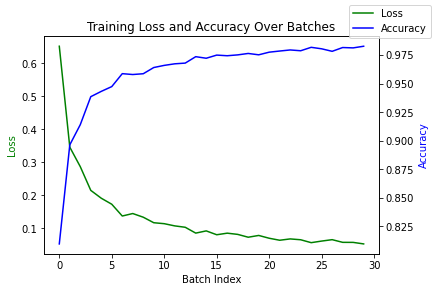

In [14]:
import matplotlib.pyplot as plt

# Example loss and accuracy values (replace with your actual recorded data)
loss_values = [
    0.65231, 0.34615, 0.28695, 0.21502, 0.19119, 0.17296,
    0.13724, 0.14476, 0.13362, 0.11688, 0.11396, 0.10728,
    0.10309, 0.08537, 0.09210, 0.08040, 0.08520, 0.08150,
    0.07290, 0.07828, 0.06978, 0.06372, 0.06776, 0.06521,
    0.05640, 0.06124, 0.06547, 0.05738, 0.05723, 0.05259
]

accuracy_values = [
    0.80969, 0.89638, 0.91406, 0.93856, 0.94319, 0.94738,
    0.95869, 0.95794, 0.95863, 0.96406, 0.96594, 0.96731,
    0.96794, 0.97356, 0.97219, 0.97494, 0.97438, 0.97513,
    0.97638, 0.97519, 0.97750, 0.97850, 0.97944, 0.97875,
    0.98175, 0.98044, 0.97825, 0.98156, 0.98125, 0.98269
]

# Plot the training loss and accuracy
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(loss_values, 'g-', label="Loss")
ax2.plot(accuracy_values, 'b-', label="Accuracy")

ax1.set_xlabel('Batch Index')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Accuracy', color='b')

plt.title('Training Loss and Accuracy Over Batches')
fig.legend(loc='upper right')
plt.show()


## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [15]:
## YOUR CODE HERE ##
model.eval()
test_corrects = 0
total_samples = 0

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    
    test_corrects += torch.sum(preds == labels.data)
    total_samples += len(labels)
    
test_accuracy = test_corrects / total_samples
print(f"Test Accuracy:{test_accuracy:.5f}")

Test Accuracy:0.96920


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [16]:
## YOUR CODE HERE ##
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.1)
        self.activation = F.relu
    #Define the feed forward neural network architecture 
    def forward(self, x):
        x = self.flatten(x)
        x = self.activation(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        x = F.softmax(x, dim = 1)
        return x


# create instance of the new neural network model
model = NeuralNetwork().to(device)

## YOUR CODE HERE ##
# Before training the model first we should define loss function and optmizer 
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)


## YOUR CODE HERE ##
# Training the model
n_epochs = 20
model.train()
loss_values = []
accuracy_values = []
for epoch in range(n_epochs):
    run_loss = 0
    run_corrects = 0
    
    for batch_i, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        run_loss += loss.item()
        run_corrects += torch.sum(preds == labels.data)
        
        # Print loss and accuracy for every 250 batchs 
        if batch_i % 250 == 249:
            batch_loss = run_loss /250
            batch_accuracy = run_corrects / (250 * train_loader.batch_size)
            print(f"Epoch: {epoch +1 } / {n_epochs}, Batch: {batch_i +1}/{len(train_loader)},Loss:{batch_loss:.5f}, Accuracy:{batch_accuracy:.5f}")
            loss_values.append(batch_loss)
            accuracy_values.append(batch_accuracy)
            run_loss = 0
            run_corrects = 0
            
# Testing model accuracy 
model.eval()
test_corrects = 0
total_samples = 0

for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    
    outputs = model(images)
    _, preds = torch.max(outputs, 1)
    
    test_corrects += torch.sum(preds == labels.data)
    total_samples += len(labels)
    
test_accuracy = test_corrects / total_samples
print(f"Test Accuracy:{test_accuracy:.5f}")

Epoch: 1 / 20, Batch: 250/938,Loss:1.77322, Accuracy:0.71713
Epoch: 1 / 20, Batch: 500/938,Loss:1.67043, Accuracy:0.80056
Epoch: 1 / 20, Batch: 750/938,Loss:1.66001, Accuracy:0.80675
Epoch: 2 / 20, Batch: 250/938,Loss:1.63958, Accuracy:0.82575
Epoch: 2 / 20, Batch: 500/938,Loss:1.63898, Accuracy:0.82481
Epoch: 2 / 20, Batch: 750/938,Loss:1.63171, Accuracy:0.83256
Epoch: 3 / 20, Batch: 250/938,Loss:1.55463, Accuracy:0.91169
Epoch: 3 / 20, Batch: 500/938,Loss:1.52997, Accuracy:0.93681
Epoch: 3 / 20, Batch: 750/938,Loss:1.52302, Accuracy:0.94250
Epoch: 4 / 20, Batch: 250/938,Loss:1.51770, Accuracy:0.94750
Epoch: 4 / 20, Batch: 500/938,Loss:1.51550, Accuracy:0.94888
Epoch: 4 / 20, Batch: 750/938,Loss:1.51261, Accuracy:0.95206
Epoch: 5 / 20, Batch: 250/938,Loss:1.51208, Accuracy:0.95206
Epoch: 5 / 20, Batch: 500/938,Loss:1.50970, Accuracy:0.95381
Epoch: 5 / 20, Batch: 750/938,Loss:1.50552, Accuracy:0.95856
Epoch: 6 / 20, Batch: 250/938,Loss:1.50379, Accuracy:0.95950
Epoch: 6 / 20, Batch: 50

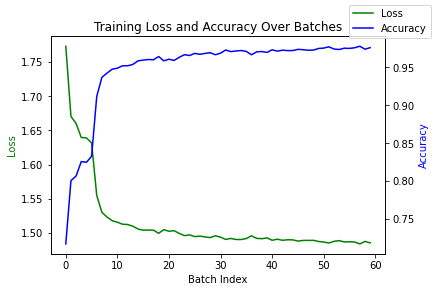

In [18]:
import matplotlib.pyplot as plt

# Loss and accuracy data (replace with your actual recorded data)
epochs = 20

# Each value represents loss and accuracy respectively
training_data = [
    (1.77322, 0.71713), (1.67043, 0.80056), (1.66001, 0.80675),
    (1.63958, 0.82575), (1.63898, 0.82481), (1.63171, 0.83256),
    (1.55463, 0.91169), (1.52997, 0.93681), (1.52302, 0.94250),
    (1.51770, 0.94750), (1.51550, 0.94888), (1.51261, 0.95206),
    (1.51208, 0.95206), (1.50970, 0.95381), (1.50552, 0.95856),
    (1.50379, 0.95950), (1.50403, 0.96031), (1.50384, 0.96000),
    (1.49929, 0.96425), (1.50458, 0.95856), (1.50227, 0.96069),
    (1.50310, 0.95913), (1.49901, 0.96325), (1.49587, 0.96669),
    (1.49697, 0.96556), (1.49442, 0.96838), (1.49516, 0.96719),
    (1.49389, 0.96838), (1.49300, 0.96925), (1.49565, 0.96663),
    (1.49366, 0.96869), (1.49029, 0.97288), (1.49171, 0.97075),
    (1.49018, 0.97156), (1.49018, 0.97213), (1.49155, 0.97100),
    (1.49558, 0.96656), (1.49184, 0.97044), (1.49137, 0.97081),
    (1.49253, 0.96963), (1.48908, 0.97313), (1.49059, 0.97131),
    (1.48907, 0.97263), (1.48976, 0.97206), (1.48966, 0.97213),
    (1.48786, 0.97369), (1.48883, 0.97325), (1.48883, 0.97256),
    (1.48895, 0.97275), (1.48732, 0.97488), (1.48648, 0.97538),
    (1.48503, 0.97706), (1.48748, 0.97413), (1.48855, 0.97350),
    (1.48663, 0.97525), (1.48685, 0.97494), (1.48650, 0.97581),
    (1.48372, 0.97781), (1.48738, 0.97394), (1.48526, 0.97594)
]

# Split into two lists: losses and accuracies
loss_values = [data[0] for data in training_data]
accuracy_values = [data[1] for data in training_data]

# Plot the training loss and accuracy
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(loss_values, 'g-', label="Loss")
ax2.plot(accuracy_values, 'b-', label="Accuracy")

ax1.set_xlabel('Batch Index')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Accuracy', color='b')

plt.title('Training Loss and Accuracy Over Batches')
fig.legend(loc='upper right')
plt.show()


## Saving your model
Using `torch.save`, save your model for future loading.

In [20]:
## YOUR CODE HERE ##
torch.save(model,'final_model')